<a href="https://colab.research.google.com/github/zenafey/colab-notebooks/blob/main/prodia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prodia colab notebook for easy API use
made by @zenafey
You should get your personal api key of Prodia API before using, see https://docs.prodia.com/reference/getting-started-guide

Installing prodiapy module

In [ ]:
!pip install -U prodiapy

Import everything !

In [ ]:
from prodiapy import (
    StableDiffusion,
    StableDiffusionXL,
    Upscaler
)
from PIL import Image
from google.colab import files
import base64
import requests

API_KEY = "replace with your api key"

def show_image(url):
  return Image.open(requests.get(url, stream=True).raw)

def bytes_to_base64(bytes_data):
    return base64.b64encode(bytes_data).decode('utf-8')

# Stable Diffusion zone
Here are functions of /v1/sd endpoint


In [ ]:
pipe = StableDiffusion(
    api_key=API_KEY
)

### text2img

prodiapy 14:39:54.599 - [SUCCESS]: Got result: {'job': '733c4ba1-f5a6-4eda-b789-66aa8d592617', 'status': 'succeeded', 'imageUrl': 'https://images.prodia.xyz/733c4ba1-f5a6-4eda-b789-66aa8d592617.png'}


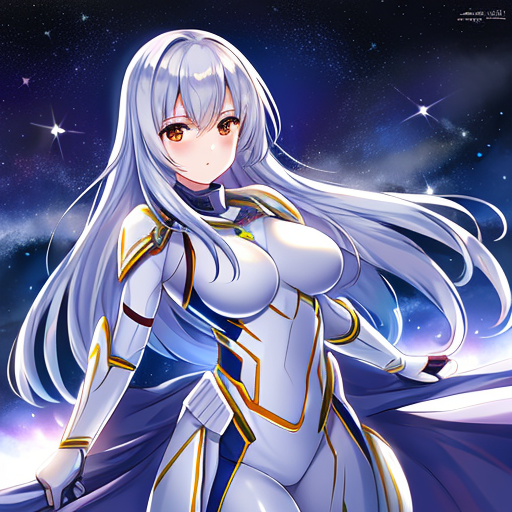

In [ ]:
job = pipe.generate(
    {
        'model': 'anythingV5_PrtRE.safetensors [893e49b9]',
        'prompt': 'space warrior, beautiful, female, ultrarealistic, soft lighting, 8k',
        'negative_prompt': '3d, cartoon, anime, (deformed eyes, nose, ears, nose), bad anatomy, ugly',
        'steps': 50,
        'cfg_scale': 7.5,
        'width': 512,
        'height': 512,
        'sampler': 'Euler',
        'seed': -1,
        'upscale': False
    }
)
result = pipe.wait_for(job)['imageUrl']

show_image(result)

### img2img

In [ ]:
uploaded = files.upload()

image_bytes = None
for obj in uploaded.values():
  image_bytes = obj

job = pipe.transform(
    {
        'imageData': bytes_to_base64(image_bytes),
        'model': 'blazing_drive_v10g.safetensors [ca1c1eab]',
        'prompt': 'space warrior, beautiful, female, ultrarealistic, soft lighting, 8k',
        'negative_prompt': '3d, cartoon, anime, (deformed eyes, nose, ears, nose), bad anatomy, ugly',
        'denoising_strength': 0.7,
        'steps': 50,
        'cfg_scale': 7.5,
        'width': 512,
        'height': 512,
        'sampler': 'DDIM',
        'seed': -1,
        'upscale': False
    }
)
result = pipe.wait_for(job)['imageUrl']

show_image(result)

### inpainting, controlnet are still under development but you can try to code it yourseld: https://docs.prodia.com/reference/controlnet , https://docs.prodia.com/reference/inpainting using methods pipe.inpainting(), pipe.controlnet()

### Constants

In [ ]:
# models
for model in pipe.models():
  print(model)

In [ ]:
# loras
for lora in pipe.loras():
  print(lora)

In [ ]:
# samplers
for sampler in pipe.samplers():
  print(sampler)

# Stable Diffusion XL zone
Here are functions of /v1/sdxl endpoint

In [ ]:
pipe = StableDiffusionXL(
    api_key=API_KEY
)

### text2img

In [ ]:
job = pipe.generate(
    {
        'model': 'sd_xl_base_1.0.safetensors [be9edd61]',
        'prompt': 'space warrior, beautiful, female, ultrarealistic, soft lighting, 8k',
        'negative_prompt': '3d, cartoon, anime, (deformed eyes, nose, ears, nose), bad anatomy, ugly',
        'steps': 50,
        'cfg_scale': 7.5,
        'sampler': 'Euler',
        'seed': -1
    }
)
result = pipe.wait_for(job)['imageUrl']

show_image(result)

### Constants

In [ ]:
# models
for model in pipe.models():
  print(model)

In [ ]:
# loras
for lora in pipe.loras():
  print(lora)

In [ ]:
# samplers
for sampler in pipe.samplers():
  print(sampler)

# Upscaler zone
here are all functions of /v1/upscale endpoint

In [ ]:
pipe = Upscaler(
    api_key=API_KEY
)

### upscale

In [ ]:
uploaded = files.upload()

image_bytes = None
for obj in uploaded.values():
  image_bytes = obj

job = pipe.upscale(
    {
        'imageData': bytes_to_base64(image_bytes),
        'resize': 2 #or 4
    }
)
result = pipe.wait_for(job)['imageUrl']

show_image(result)